## Create Simple Neural Net to Predict Diabetes Diagnosis

In [1]:
# Import tensorflow/sklearn modules.
import tensorflow as tf
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import other modules.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

dataset = load_diabetes()

data = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(f'X_train.shape {X_train.shape}')
print(f'y_train.shape {y_train.shape}')
print(f'X_test.shape {X_test.shape}')
print(f'y_test.shape {y_test.shape}')


X_train.shape (331, 10)
y_train.shape (331,)
X_test.shape (111, 10)
y_test.shape (111,)


#### Crete model

In [31]:
def model():
    model = Sequential()
    model.add(Dense(1, input_shape=[10]))
    model.add(Dense(25, kernel_regularizer='l2'))
    model.compile(optimizer='sgd', loss='mean_squared_error')
    return model

model = model()

tf.random.set_seed(42)    # Create random seed for repeatable results.

training = (
    model.fit(
        X_train, y_train,
        epochs=8,
        batch_size=24,
        validation_split=.75,
        verbose=False
    )
).history

print('Training loss by epochs: {}'.format(training['loss'][::2]))
print('Validataion loss by epochs: {}'.format(training['val_loss'][::2]))


Training loss by epochs: [35134.71484375, 17541.720703125, 6487.5205078125, 5971.03564453125]
Validataion loss by epochs: [27838.306640625, 5901.5146484375, 6785.8759765625, 5492.23583984375]


#### Visualize the results

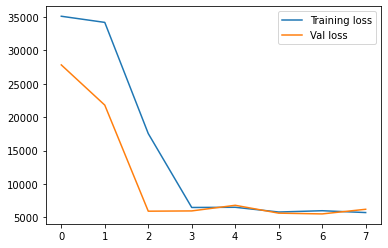

In [33]:
plt.plot(range(8), training['loss'], label='Training loss')
plt.plot(range(8), training['val_loss'], label='Val loss')
plt.legend()
